# Predicting Heart Disease using Machine Learning

This notebook looks into various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

we' re going take the following approch:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Defination
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease?

## 2.Data

>This data is the cleveland data which is available on UCI Machine learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, We will persue the project.

## 4. Features

> This is the detailed information about all the features of the dataset

**Create data Dictionary**

1. age: The person’s age in years

2. sex: The person’s sex (1 = male, 0 = female)

3. cp: chest pain type

    * Value 0: asymptomatic

    * Value 1: atypical angina

    * Value 2: non-anginal pain

    * Value 3: typical angina

4. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person’s cholesterol measurement in mg/dl

6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: resting electrocardiographic results

    * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

    * Value 1: normal

    * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

8. thalach: The person’s maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

    * 0: downsloping
    * 1: flat
    * 2: upsloping

12. ca: The number of major vessels (0–3)

13. thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

    * Value 1: fixed defect (no blood flow in some part of the heart)

    * Value 2: normal blood flow

    * Value 3: reversible defect (a blood flow is observed but it is not normal)

14. target: Heart disease (1 = no, 0= yes)


## 1. Preparing the tools
we are going to use pandas matplotlib and numpy for data analysis and manipulation

In [1]:
# Importing all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## 2. Load Data

In [2]:
df= pd.read_csv("datasets/heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.
1. What Question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and do we deal with it?
4. Where are the outliears and why do you care about them?
5. How do you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

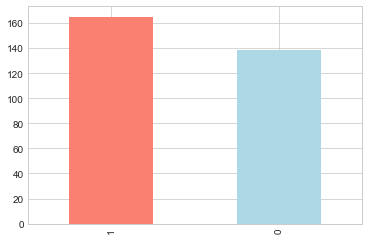

In [7]:
plt.style.use("seaborn-whitegrid")
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing Values?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4.1  Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
### Compare target column with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


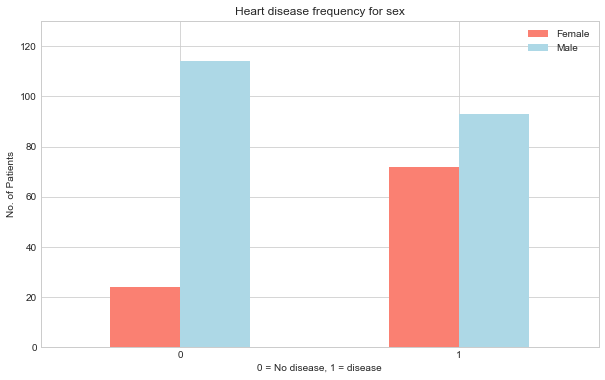

In [13]:
# lets plot the crosstab in a graph
pd.crosstab(df.target,df.sex).plot(kind="bar", color=["salmon","lightblue"],figsize=(10,6))
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("No. of Patients")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);
plt.ylim(top=130);

### 4.2 Age vs. Max Heart Rate,  for heart disease

In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

The graph has downward slope which means, as the age increases the max heart rate decreases of the patients who have heart disease

Here we can see, The graph has downward slope which means, as the age increases the max heart rate decreases of the patients who have no heart disease but the slope is less significantly downward compare to previous graph

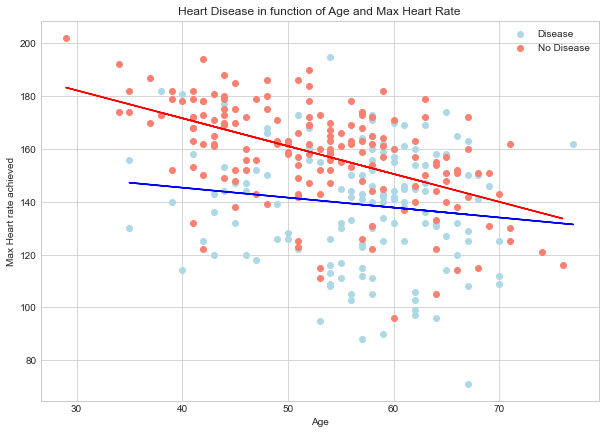

In [15]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(df.age[df.target==0],df.thalach[df.target==0],c="Lightblue")
ax.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
ax.set(xlabel="Age",ylabel="Max Heart rate achieved",title="Heart Disease in function of Age and Max Heart Rate");
ax.legend(["Disease","No Disease"])
m, b = np.polyfit(df.age[df.target==1],df.thalach[df.target==1], 1)
ax.plot(df.age[df.target==1], m*df.age[df.target==1]+b, color='red');
m, b = np.polyfit(df.age[df.target==0],df.thalach[df.target==0], 1)
ax.plot(df.age[df.target==0], m*df.age[df.target==0]+b, color='blue');

* As we can see the patients who's more older the less the max heart rate they have achieved
* Also we can see that patients who has heart disease has a slightly but significantly different slope compare to patients who does'nt have heart disease

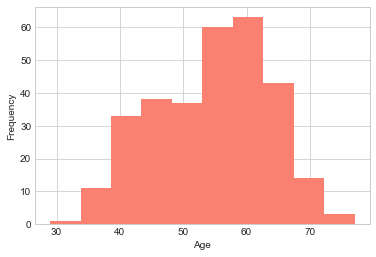

In [16]:
# Lets Check the distribution of the Age Column
df["age"].plot(kind="hist", color="salmon");
plt.xlabel("Age");

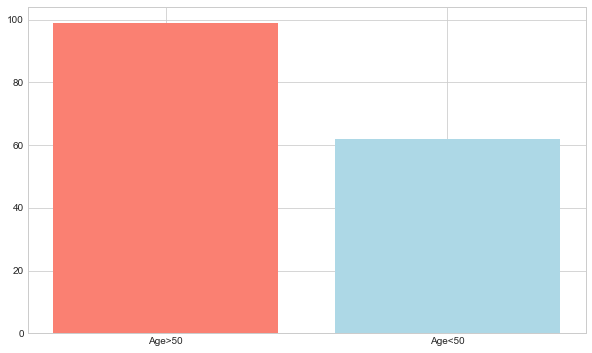

In [17]:
# lets check age>50 vs age<50
fig,ax=plt.subplots(figsize=(10,6))
ax.bar("Age>50",df[(df["age"]>50) & (df["target"]==1)].shape[0],color='Salmon')
ax.bar("Age<50",df[(df["age"]<50) & (df["target"]==1)].shape[0],color="lightblue");

Here, we can see the patients age are left scewed which means most of our samples are in between the age of 55 to 65 

as well as we can see that patient who's age is greater than 50 is more likely to get a heart disease

### 4.3 Heart Disease Frequency per chest pain type 
cp chest pain type:-
* Value 1 typical angina
* Value 2 atypical angina
* Value 3 non-anginal pain
* Value 4 asymptomatic

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


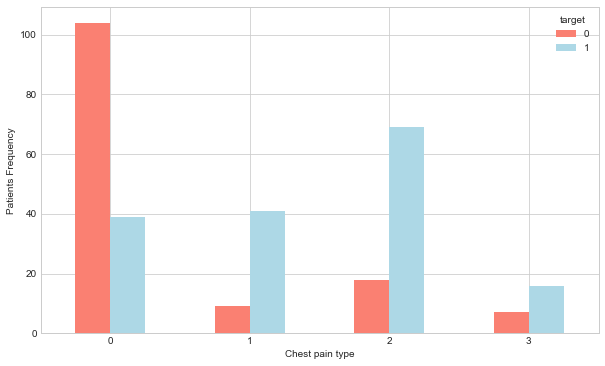

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","lightblue"],figsize=(10,6))
plt.xlabel("Chest pain type")
plt.ylabel("Patients Frequency")
plt.xticks(rotation=0);

### 4.4 Correlation Matrix

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


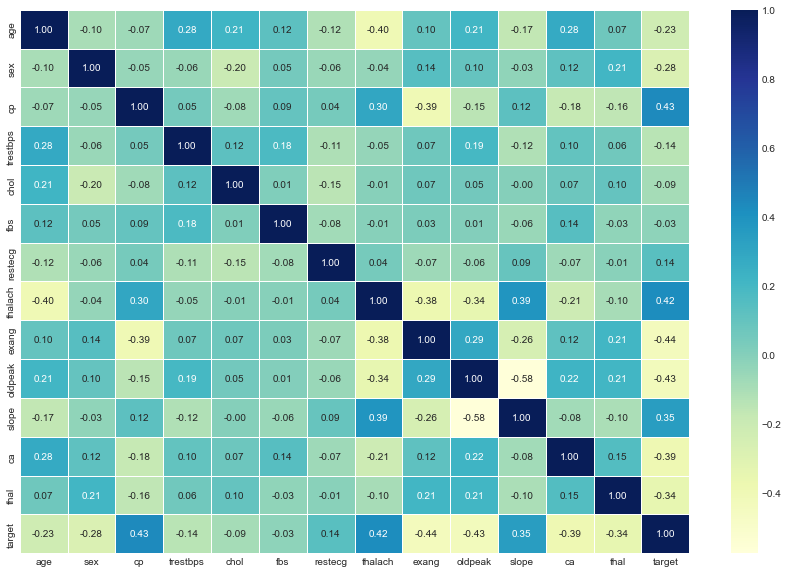

In [22]:
# Lets make our correltaion matrix a little prettier
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

## 5. Modelling 

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into x and y
x=df.drop("target", axis=1)
y=df["target"]

In [25]:
# Split data into train and test set

np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
# lets see our training sets

# lets check x_train
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


It has been shuffled and their is only 80% of the data in the training set

In [27]:
# lets check y_train
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

same as x_train the y_train is also has been shuffled and their is only 80% of the data in the training set.

Now, we have our training and test sets, its time to build a machine learning model.

we'll train it (find patterns) on the training set.

we'll test it (use the patterns) on the test set.

we are going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neigbours Classifer
3. Random Forest Classifer

In [28]:
# Putting the models in a dictionary
models= {"Logistic Regression": LogisticRegression(),
        "K-Nearest Neigbours Classifer": KNeighborsClassifier(),
        "Random Forest Classifer": RandomForestClassifier()}

# Creating a function to fit and score

def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and Evaluates given machine learning models
    models: a dict of different scikit learn machine learning model
    x_train: train data (no label)
    x_test: testing data (no label)
    y_train: training labels
    y_test: testing labels
    '''
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep our score
    model_score={}
    # loop through our models dictionary
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # model score
        model_score[name]=round(model.score(x_test,y_test),4)*100
    return model_score

In [29]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

d:\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 88.52,
 'K-Nearest Neigbours Classifer': 68.85,
 'Random Forest Classifer': 83.61}

### Model comparison

In [30]:
model_comparison= pd.DataFrame(model_score, index=["Accuracy"])
model_comparison

,Logistic Regression,K-Nearest Neigbours Classifer,Random Forest Classifer
Accuracy,88.52,68.85,83.61


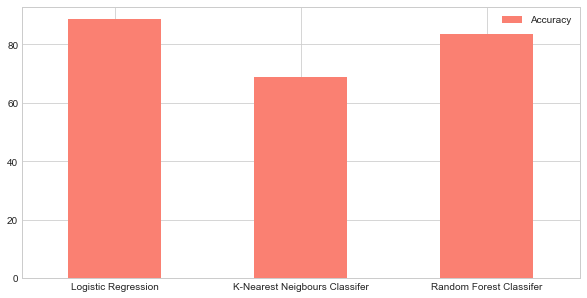

In [31]:
model_comparison.T.plot(kind="bar", figsize=(10,5),
                       color=["salmon"]);
plt.xticks(rotation=0);

Now, we got a baseline model... and we know a model's first prediction aren't always what we should based our next step off.

what should we do now?

Lets look at the following:
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-val Score
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. Roc Curve
10. Area under the curve (AUC)


### Hyperparameter Tuning

In [32]:
# Lets tune KNN

train_score=[]
test_score=[]

# Lets create a list of different values for a neighbors

neighbors=range(1,21)
KNN= KNeighborsClassifier()

for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_score.append(KNN.score(x_train,y_train))
    test_score.append(KNN.score(x_test,y_test))

In [33]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on Test data: 75.41%


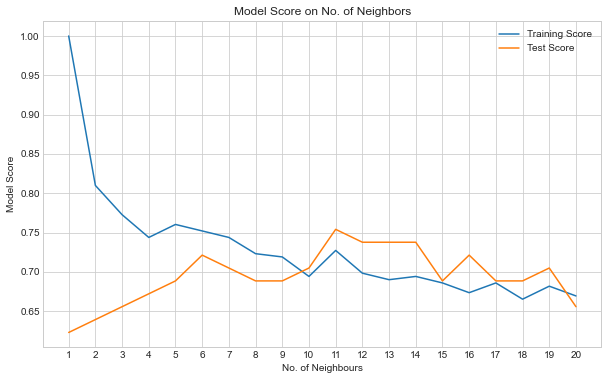

In [35]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.legend(["Training Score","Test Score"])
plt.xlabel("No. of Neighbours")
plt.ylabel("Model Score")
plt.title("Model Score on No. of Neighbors")
plt.xticks(np.arange(1,21,1));
print(f"Maximum KNN Score on Test data: {max(test_score)*100:.2f}%")

In [36]:
RandomizedSearchCV(RandomForestClassifier,param_distributions=[])

RandomizedSearchCV(estimator=<class 'sklearn.ensemble._forest.RandomForestClassifier'>,
                   param_distributions=[])

## Hyperparameter Tuning with RandomSearchCV

we are going to tune:
1. LogisticRegression()
2. RandomForestClassifier()

In [37]:
# Create a hyperparameter grid for logisticRegression()
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer()
rf_grid= {"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [38]:
# Tune LogisticRegression()
np.random.seed(42)

# setup random hyperparameter for LogisticRegression()

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# Fit random hyperparamter search model for logisticRegression()
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we tuned LogisticRegression lets do the same for RandomForestClassifier()

In [ ]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         rf_grid,
                         n_iter=20,
                         cv=5,
                         verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test,y_test)

## Hyperparameter Tuning using GridSearchCV

In [ ]:
gs_log_reg=GridSearchCV(LogisticRegression(),
                        cv=5,
                        param_grid=log_reg_grid,
                       verbose=True)

gs_log_reg.fit(x_train,y_train)

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(x_test,y_test)

## Evaluating our tuned classification model, beyond accuracy
* ROC curve and AUC curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score`

In [ ]:
y_preds=gs_log_reg.predict(x_test)

In [ ]:
plot_roc_curve(gs_log_reg,x_test,y_test);

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test,y_preds):
    '''
    plot's a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predict Label")

In [ ]:
plot_conf_matrix(y_test,y_preds)

Now we have done ROC and AUC curve lets now make a classification report as well as a cross validation precision, recall and f1 score

In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
cross_val_score(LogisticRegression(),x_train,y_train)

### Calculate Evaluation Metrics using Cross-validation

We are going to calculate accuracy,precision,recall,f1-score of our model using cross validation so to do so we are going to use `cross_val_score()`

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

In [ ]:
# cross-validated precision
cv_pre= cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision"
                       )
cv_pre=cv_pre.mean()
cv_pre

In [ ]:
# cross-validation Recall
cv_rec= cross_val_score(clf,
                        x,
                       y,
                       cv=5,
                       scoring="recall")
cv_rec=cv_rec.mean()
cv_rec

In [ ]:
# cross-validation F1-score
cv_f1=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

In [ ]:
sns.set(font_scale=1.2)
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall": cv_rec,
                         "F1-Sore":cv_f1},
                       index=["Score"])    

In [ ]:
cv_metrics.T.plot(kind="bar",figsize=(10,7), color=["salmon"])

### Feature Importance 

Feature Importance is another as asking, "Which features contributed most to the  outcome of the model and how did they contribute?"

Finding Features importance is different for each model. One way to find feature importance is to search for "(MODEL NAME) feature Importance"

Lets find the feature importance of our logistic Regression model...

In [ ]:
gs_log_reg.best_params_

In [ ]:
# Fit an instance of LogisticRegression()

clf= LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(x_train,y_train)
clf.coef_

In [ ]:
# lets match coefficent features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))

In [ ]:
# lets visualise this
feature_df=pd.DataFrame(feature_dict, index=["coefficent"])
feature_df.T.plot.bar(legend=False, color="salmon", figsize=(12,5))
plt.xticks(rotation=0);

## 6. Experimentaion

We haven't mate our evalutaion metrics yet.. What can we do??
* Could we collect more data?
* Could we try a better a model?? Like catboost or xgboost?
* can we improve our current model? (Beyond what we have..)

In [ ]:
# lets save our model for now
import pickle
pickle.dump(clf, open("model.pkl","wb"))